<a href="https://colab.research.google.com/github/Jlok17/Data620/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project 2:
1. Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
2. Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
3. What can you infer about each of the distinct groups?





---





> <p align = "justify"> The dataset was obtained from the link below and uploaded to github. The context of this dataset is a network called "Bitcoin Alpha", this is where users rate each other's trustworthiness on a scale of -10 to +10. With +10 being the most trustworther, the whole point of this network is to serve as a record of users' reputation. Therefore to help prevent transactions with fraudulent individuals or scammers.


[Bitcoin Alpha](https://www.kaggle.com/datasets/boneacrabonjac/bitcoin-alpha)


In [130]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv("https://raw.githubusercontent.com/Jlok17/Data620/main/DataSources/soc-sign-bitcoinalpha.csv")

In [132]:
df.head(10)

,Source,Target,Rating,Time
0,7188,1,10,1407470400
1,430,1,10,1376539200
2,3134,1,10,1369713600
3,3026,1,10,1350014400
4,3010,1,10,1347854400
5,804,1,10,1337572800
6,160,1,10,1394683200
7,95,1,9,1384578000
8,377,1,7,1414728000
9,888,1,7,1365652800


In [133]:
df.describe()

,Source,Target,Rating,Time
count,24186.000000,24186.000000,24186.000000,2.418600e+04
mean,864.029314,1051.093815,1.463946,1.347099e+09
std,1592.085638,1871.765504,2.903656,3.397039e+07
min,1.000000,1.000000,-10.000000,1.289192e+09
25%,58.000000,66.000000,1.000000,1.312690e+09
50%,238.000000,279.000000,1.000000,1.345435e+09
75%,898.000000,1068.000000,2.000000,1.369454e+09
max,7604.000000,7604.000000,10.000000,1.453439e+09




* Source: Node ID of source (i.e. rater)
* Target: Node ID of target (i.e. ratee)
* Rating: Source's rating for the target, ranging from -10 to +10 by 1
* Time: Time of the rating, measured as seconds since Epoch.


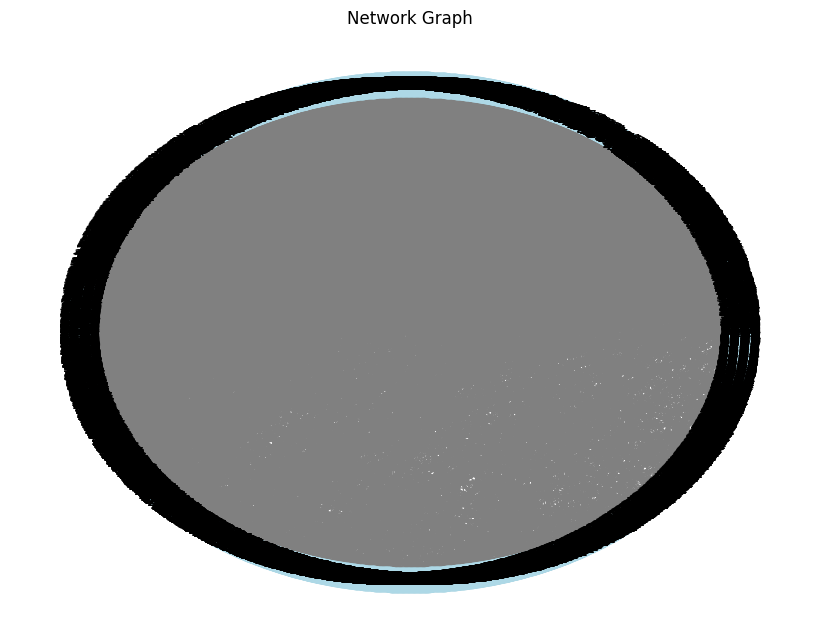

In [134]:
graph = nx.Graph()
edges = df[['Source', 'Target']].values.tolist()
graph.add_edges_from(edges)


plt.figure(figsize=(8, 6))
nx.draw(graph, pos=nx.circular_layout(graph), with_labels=True, node_color='lightblue', edge_color='gray')
plt.title('Network Graph')
plt.show()


In [135]:
print("Graph Information:")
print("Number of nodes:", graph.number_of_nodes())
print("Number of edges:", graph.number_of_edges())
print("Average degree:", round(sum(dict(graph.degree()).values()) / graph.number_of_nodes(), 2))
print("Graph density:", round(nx.density(graph), 2))

Graph Information:
Number of nodes: 3783
Number of edges: 14124
Average degree: 7.47
Graph density: 0.0


In [136]:
degree_centrality = nx.degree_centrality(graph)
betweenness_centrality = nx.betweenness_centrality(graph)

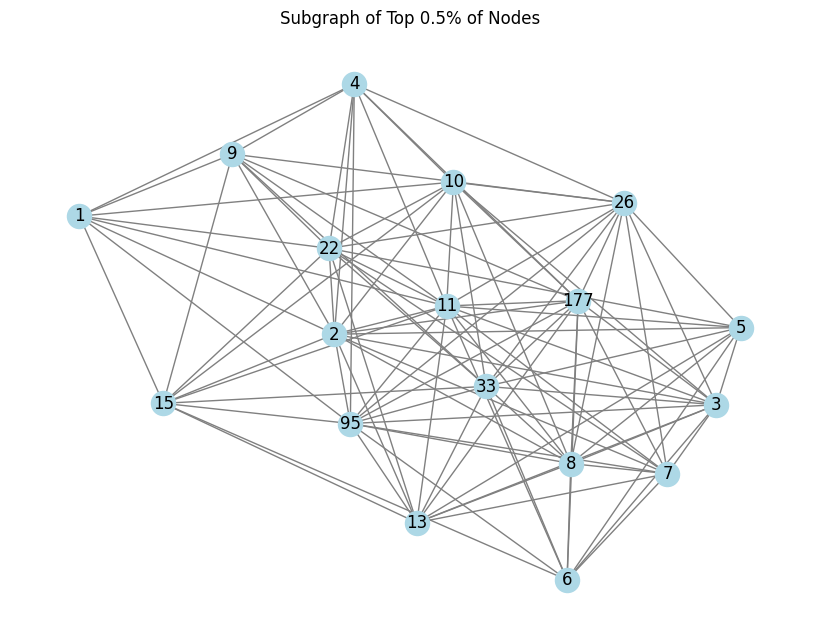

In [137]:
threshold = int(len(graph.nodes) * 0.005)
important_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:threshold]
subgraph = graph.subgraph(important_nodes)

plt.figure(figsize=(8, 6))
nx.draw(subgraph, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title('Subgraph of Top 0.5% of Nodes')
plt.show()

In [138]:
degree_centrality = nx.degree_centrality(subgraph)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("Degree Centrality:")
for node, centrality in sorted_degree_centrality:
    print(f"Node {node}: {centrality}")

betweenness_centrality = nx.betweenness_centrality(subgraph)
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nBetweenness Centrality:")
for node, centrality in sorted_betweenness_centrality:
    print(f"Node {node}: {centrality}")


Degree Centrality:
Node 11: 0.9411764705882353
Node 2: 0.8235294117647058
Node 177: 0.7647058823529411
Node 95: 0.7647058823529411
Node 3: 0.7058823529411764
Node 8: 0.7058823529411764
Node 33: 0.7058823529411764
Node 22: 0.7058823529411764
Node 26: 0.7058823529411764
Node 10: 0.6470588235294118
Node 13: 0.6470588235294118
Node 7: 0.5882352941176471
Node 15: 0.5882352941176471
Node 4: 0.5294117647058824
Node 5: 0.5294117647058824
Node 6: 0.5294117647058824
Node 9: 0.5294117647058824
Node 1: 0.47058823529411764

Betweenness Centrality:
Node 11: 0.059025125201595786
Node 2: 0.04299719887955182
Node 95: 0.03511055937526524
Node 22: 0.031617912316441725
Node 177: 0.028373281130634066
Node 33: 0.027947012138188607
Node 26: 0.024956232492997193
Node 10: 0.02124209532297767
Node 15: 0.018443627450980393
Node 3: 0.01414592352092352
Node 8: 0.01414592352092352
Node 13: 0.01396767040149393
Node 9: 0.011175568712333418
Node 6: 0.00976015406162465
Node 7: 0.009083481877599527
Node 5: 0.00879753416

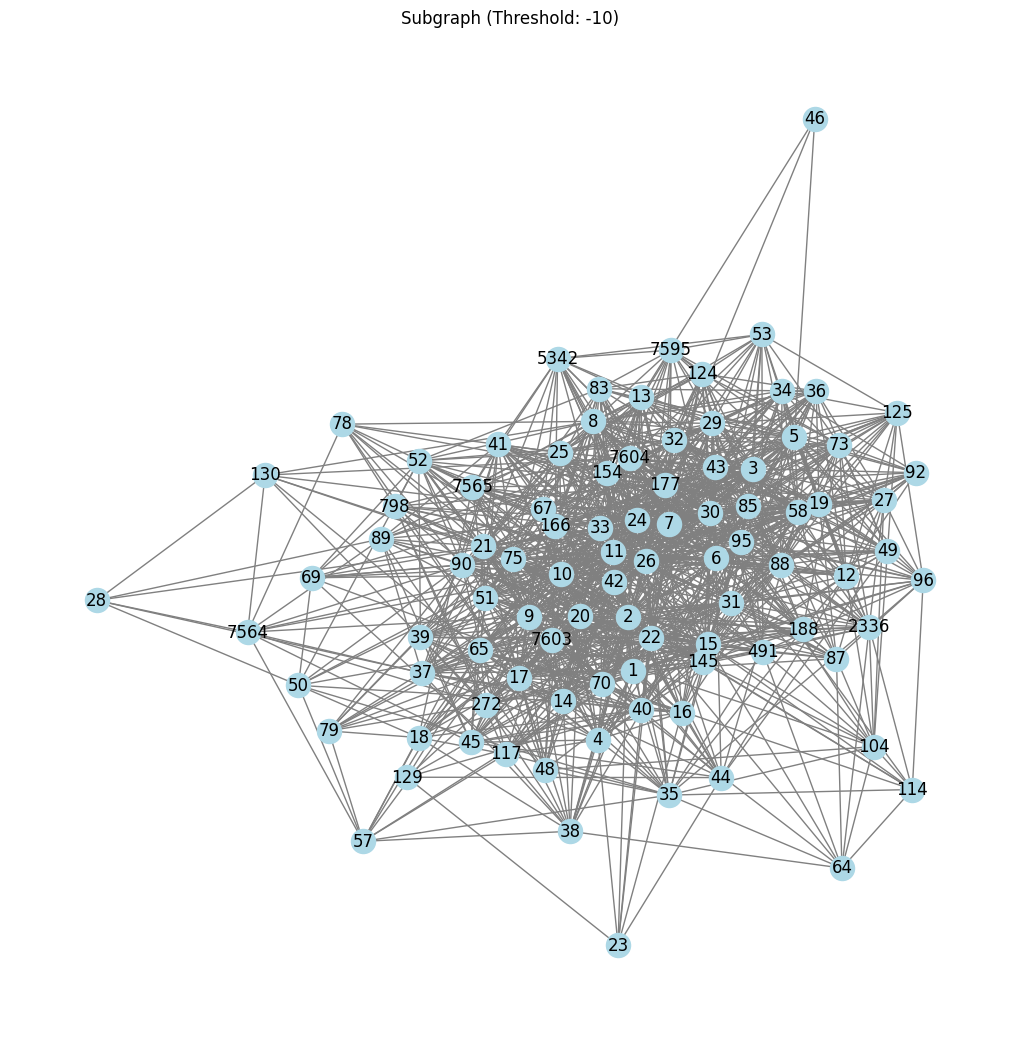

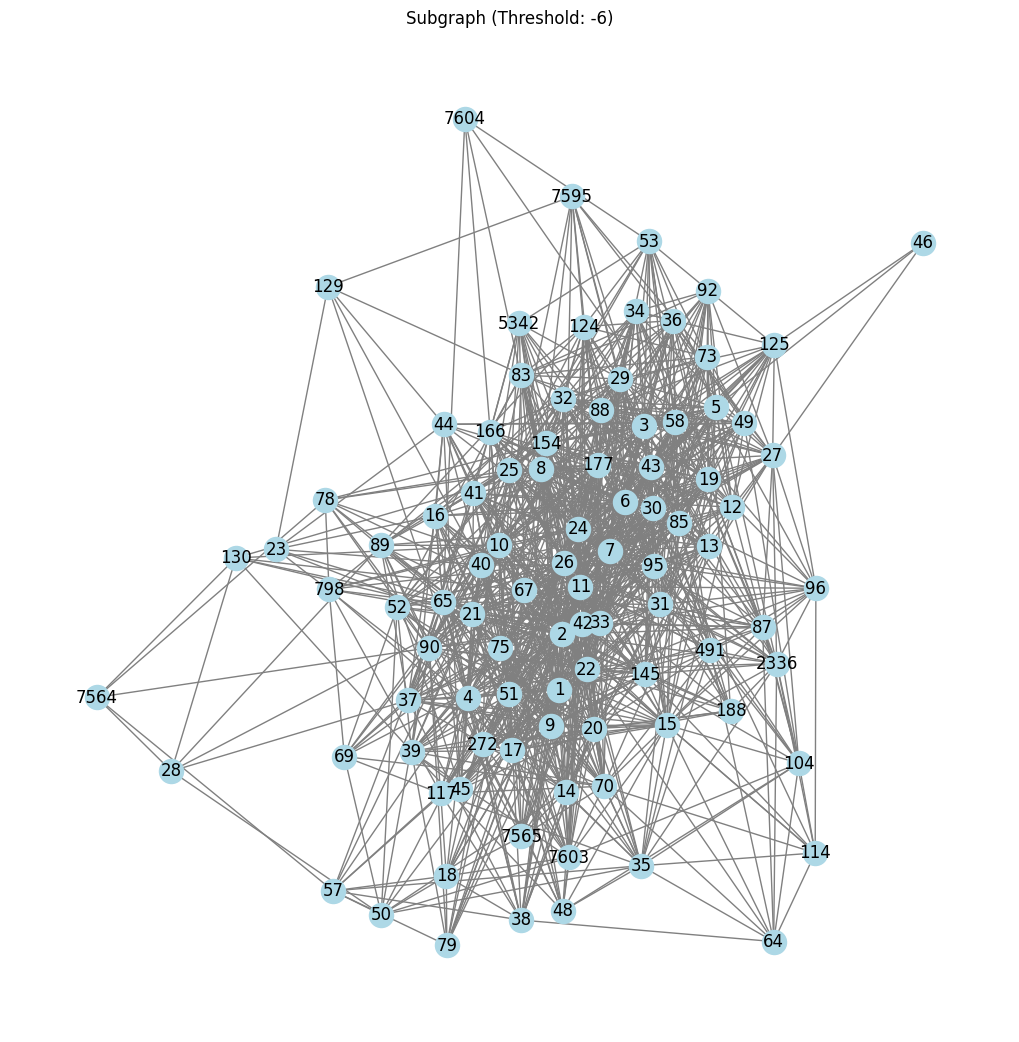

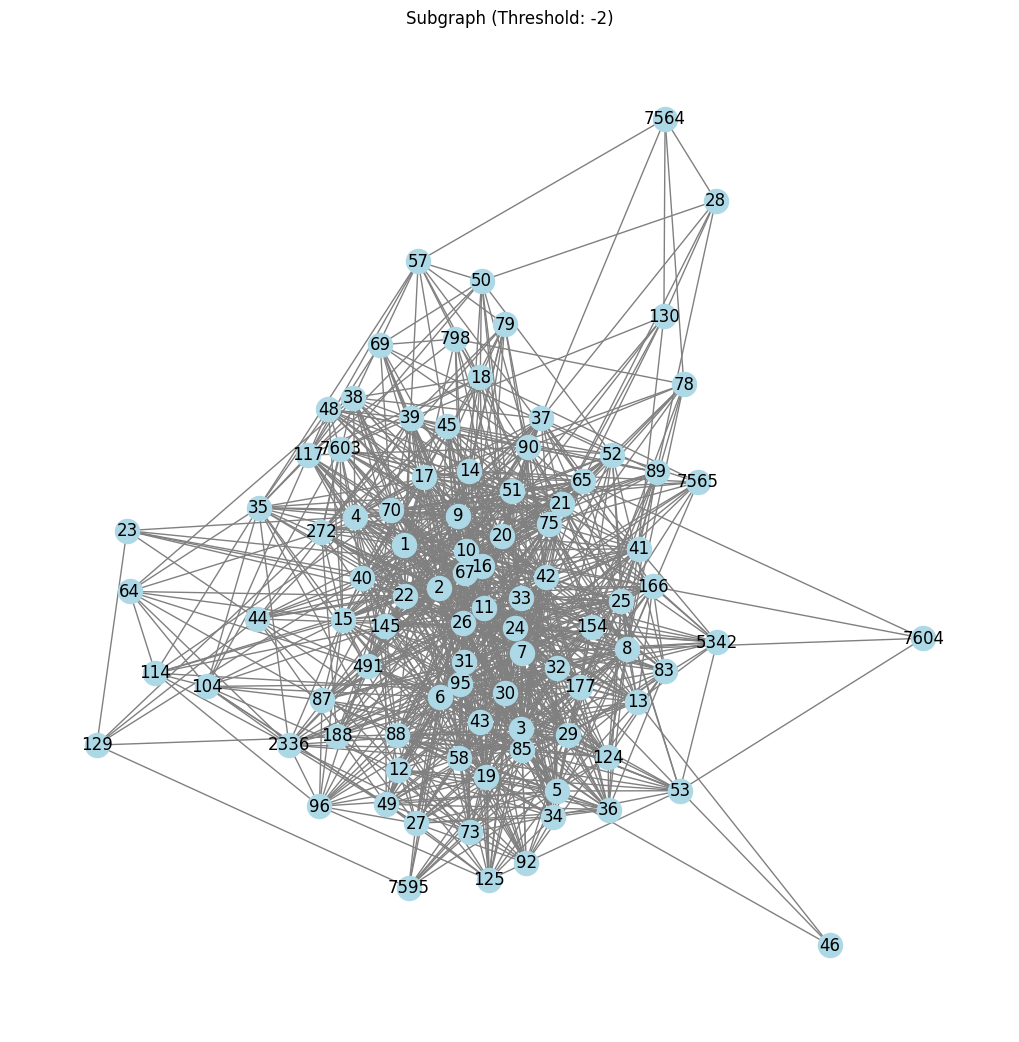

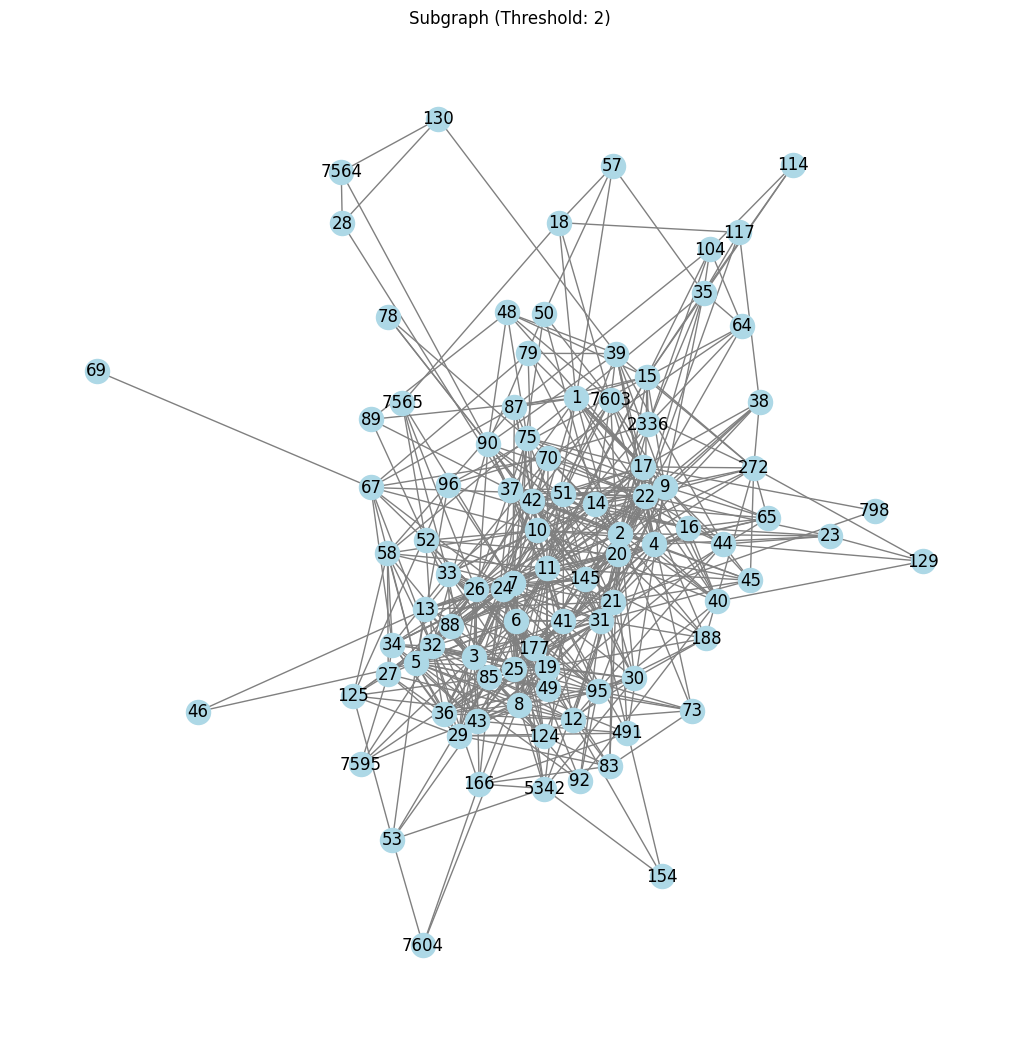

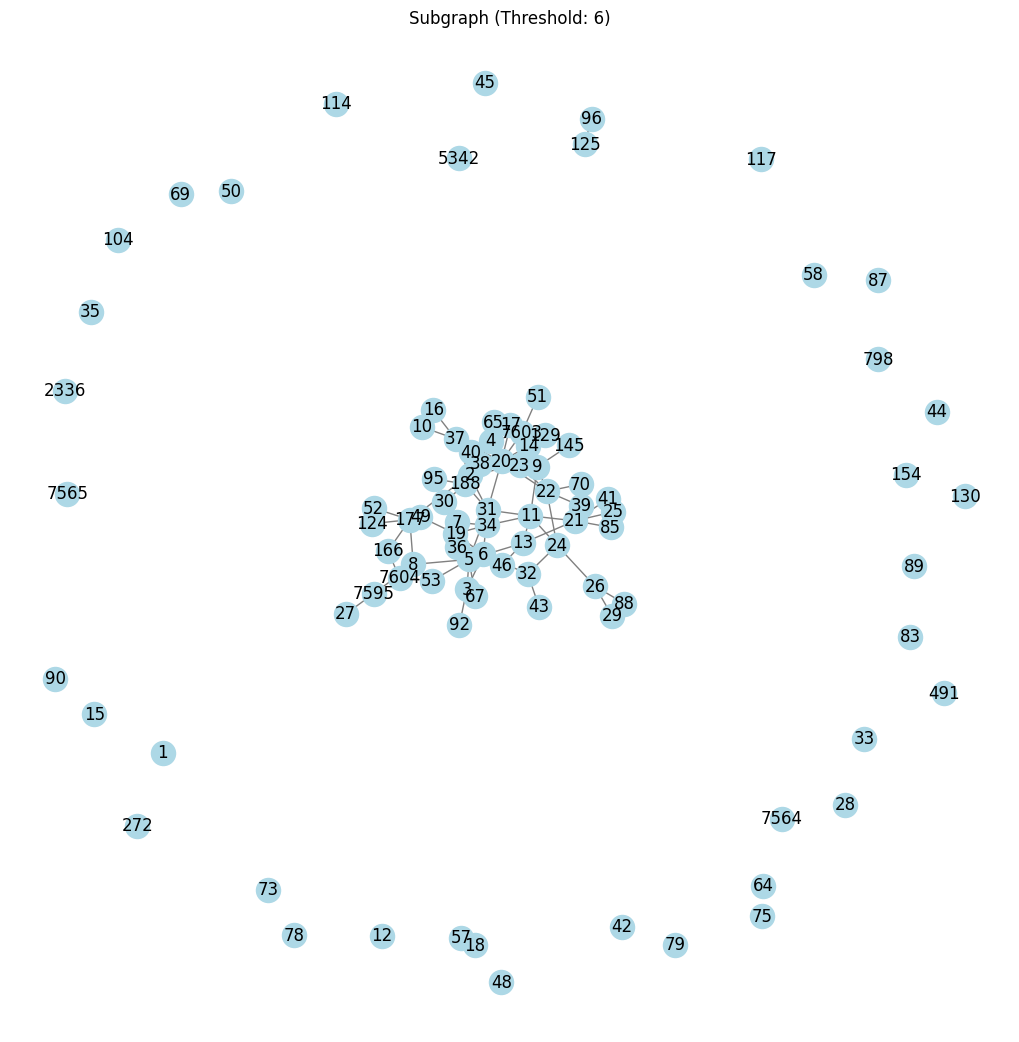

In [140]:
graph = nx.from_pandas_edgelist(df, 'Source', 'Target', edge_attr='Rating')

def island_method(g, iterations=5):
    weights = [edata['Rating'] for _, _, edata in g.edges(data=True)]
    mn = int(min(weights))
    mx = int(max(weights))
    step = int((mx - mn) / iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn, mx, step)]

def trim_edges(g, threshold):
    trimmed_graph = g.copy()
    for u, v, data in g.edges(data=True):
        if data['Rating'] < threshold:
            trimmed_graph.remove_edge(u, v)
    return trimmed_graph



threshold = int(len(graph.nodes) * 0.025)
important_nodes = sorted(nx.degree_centrality(graph), key=nx.degree_centrality(graph).get, reverse=True)[:threshold]
subgraph = graph.subgraph(important_nodes)
island_results = island_method(subgraph)
for threshold, subgraph in island_results:
    plt.figure(figsize=(10, 10))
    nx.draw(subgraph, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.title(f'Subgraph (Threshold: {threshold})')
    plt.show()

In [141]:
average_ratings = df.groupby('Target')['Rating'].agg(['mean', 'count']).reset_index()
filtered_ratings = average_ratings[average_ratings['count'] >= 10]
sorted_ratings = filtered_ratings.sort_values('mean', ascending=False)

top_targets = sorted_ratings.head(10)
print("Top Targets:")
print(top_targets)
bottom_targets = sorted_ratings.tail(10)
print("\nBottom Targets:")
print(bottom_targets)

Top Targets:
     Target      mean  count
146     147  4.636364     11
93       94  4.166667     18
19       20  4.018868     53
70       71  4.000000     22
179     180  3.909091     11
194     195  3.636364     11
1         2  3.585366    205
59       60  3.500000     28
73       74  3.500000     24
128     129  3.411765     17

Bottom Targets:
      Target      mean  count
3737    7588 -2.842105     19
3728    7579 -3.400000     10
3740    7591 -3.470588     17
3749    7600 -3.500000     34
3738    7589 -3.733333     15
3747    7598 -5.789474     19
3748    7599 -5.789474     19
3750    7601 -7.500000     16
3753    7604 -8.602740     73
3751    7602 -8.823529     17


In [155]:
target_counts = df.groupby('Target')['Rating'].count()
print(target_counts.describe())
print("   ")
print("The Median is: {}".format(target_counts.median()))

count    3754.000000
mean        6.442728
std        16.461084
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       398.000000
Name: Rating, dtype: float64
   
The Median is: 2.0


### Takeaways:

*   When looking at the graph that is the top 0.5% of users by Degree Centrality, we can see that Node's 11, 2, 177, and 95 are most important nodes throughout this network.

*   As we are breaking up the Network Graph into different groups which is first only the top 2.5% of users were picked we can see the amount of people that are actually have a positive edge value which is interesting to see since majority of people at the top users would be classified as a negative reputation.

*   The average amount of raters per a person is 6.44 with a Median of 2.0 showing that most of these traders are low leveled or there is a small amount of raters within this system

*   The Top 5 Rated traders are: 147, 94, 20, 71, 180.

*   The Bottom 5 Rated Traders are: 7598, 7599, 7601, 7604, 7602

The reason why this is important to note for these types of traders is that most of the time when people are trading online they are looking for the more frequent traders over higher rating. Higher Ratings with only 1 or 2 raters are more looked past so from the above list. If I had to made an assumption, Person 20 is actually the most trustworthy trader as he has 53 raters with the 3rd highest average score which is more than one in the top 5.


### Reference:
S. Kumar, B. Hooi, D. Makhija, M. Kumar, V.S. Subrahmanian, C. Faloutsos. REV2: Fraudulent User Prediction in Rating Platforms. 11th ACM International Conference on Web Searchand Data Mining (WSDM), 2018.